In [1]:
## Traffic Data Analysis for Melbourne



In [8]:
import pandas as pd
import os
import glob

In [ ]:
## Combining 14 csv files to 1
# df_list = [pd.read_csv(f) for f in csv_files]

# traffic_df = pd.concat(df_list, ignore_index = True)

# traffic_df.head()

,NB_SCATS_SITE,QT_INTERVAL_COUNT,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,...,V90,V91,V92,V93,V94,V95,NM_REGION,CT_RECORDS,QT_VOLUME_24HOUR,CT_ALARM_24HOUR
0,100,2025-09-06,1,6,6,3,3,1,0,4,...,10,4,8,6,4,8,WV1,96,975,0
1,100,2025-09-06,2,35,27,21,27,15,10,9,...,44,54,49,49,46,38,WV1,96,6989,0
2,100,2025-09-06,3,49,49,35,26,33,15,20,...,66,63,57,59,54,49,WV1,96,8004,0
3,100,2025-09-06,4,34,22,25,21,18,9,10,...,50,47,40,41,33,29,WV1,96,7249,0
4,100,2025-09-06,5,4,8,6,3,4,8,1,...,6,11,4,6,5,3,WV1,96,1029,0


In [ ]:
## Creating 1 file
# traffic_df.to_csv("traffic_combined.csv", index=False)

In [9]:
# Creating goole drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Read from google drive
file_path = '/content/drive/MyDrive/traffic_combined.csv'
traffic_df = pd.read_csv(file_path)


traffic_df.head()

,NB_SCATS_SITE,QT_INTERVAL_COUNT,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,...,V90,V91,V92,V93,V94,V95,NM_REGION,CT_RECORDS,QT_VOLUME_24HOUR,CT_ALARM_24HOUR
0,100,2025-09-06,1,6,6,3,3,1,0,4,...,10,4,8,6,4,8,WV1,96,975,0
1,100,2025-09-06,2,35,27,21,27,15,10,9,...,44,54,49,49,46,38,WV1,96,6989,0
2,100,2025-09-06,3,49,49,35,26,33,15,20,...,66,63,57,59,54,49,WV1,96,8004,0
3,100,2025-09-06,4,34,22,25,21,18,9,10,...,50,47,40,41,33,29,WV1,96,7249,0
4,100,2025-09-06,5,4,8,6,3,4,8,1,...,6,11,4,6,5,3,WV1,96,1029,0


In [11]:
# Check basic information
print("Dataset Shape:", traffic_df.shape)
print("\nColumn Names:", traffic_df.columns.tolist())
print("\nData Types and Null Counts:")
print(traffic_df.info())

# Check missing values
print("\nMissing values per column:")
print(traffic_df.isnull().sum())

Dataset Shape: (1622772, 103)

Column Names: ['NB_SCATS_SITE', 'QT_INTERVAL_COUNT', 'NB_DETECTOR', 'V00', 'V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'NM_REGION', 'CT_RECORDS', 'QT_VOLUME_24HOUR', 'CT_ALARM_24HOUR']

Data Types and Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622772 entries, 0 to 1622771
Columns: 103 entries, NB_SCATS_SITE to CT_ALARM_24HOUR

In [12]:
# Select all V-columns (traffic volume counts)
volume_cols = [col for col in traffic_df.columns if col.startswith("V")]

# Basic statistics for each interval
volume_stats = traffic_df[volume_cols].describe().transpose()
print(volume_stats.head())  # show first few intervals

# Find the interval with highest average traffic
avg_traffic = traffic_df[volume_cols].mean()
peak_interval = avg_traffic.idxmax()
print(f"\nInterval with highest average traffic: {peak_interval} (avg={avg_traffic[peak_interval]:.2f})")

# sum across all sites per interval to see total traffic pattern
total_traffic_by_interval = traffic_df[volume_cols].sum()
print("\nTotal traffic per interval (first 10):")
print(total_traffic_by_interval.head(10))


         count      mean        std  min  25%  50%  75%     max
V00  1622772.0  3.167592  12.987599 -1.0  0.0  0.0  1.0   759.0
V01  1622772.0  2.875160  12.548715 -1.0  0.0  0.0  1.0   759.0
V02  1622772.0  2.724794  12.513832 -1.0  0.0  0.0  1.0  1012.0
V03  1622772.0  2.395675  11.732493 -1.0  0.0  0.0  1.0   759.0
V04  1622772.0  2.183874  11.540057 -1.0  0.0  0.0  1.0   759.0

Interval with highest average traffic: V69 (avg=23.18)

Total traffic per interval (first 10):
V00    5140280
V01    4665729
V02    4421719
V03    3887635
V04    3543929
V05    3218467
V06    2942887
V07    2719713
V08    2602635
V09    2461809
dtype: int64


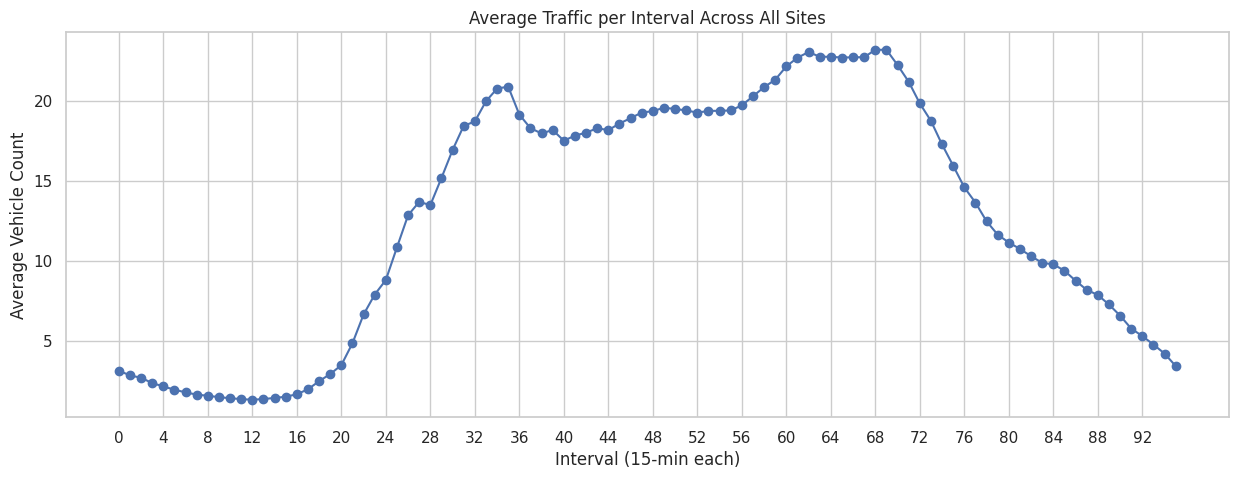

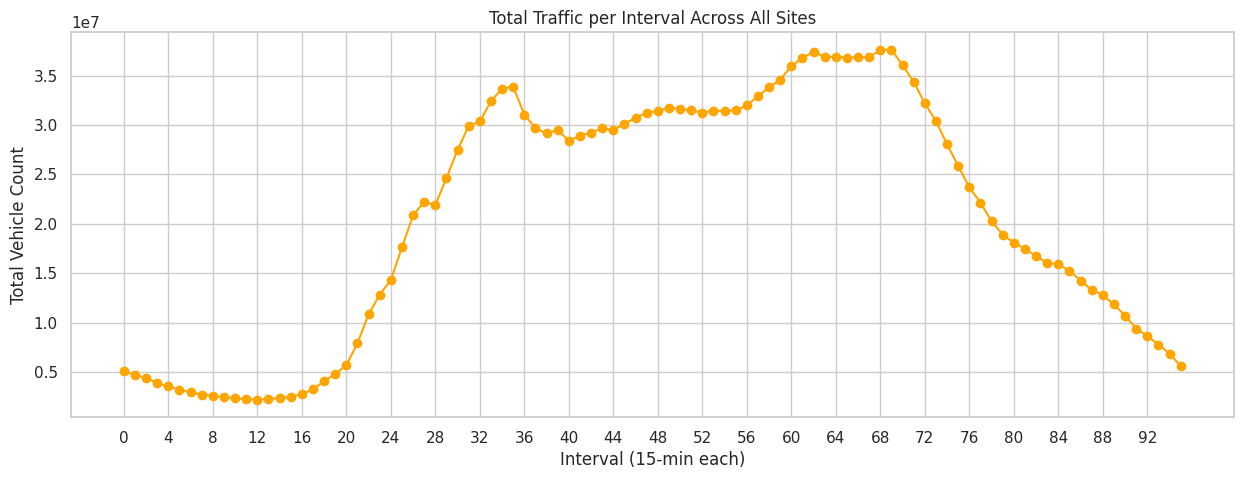

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Average traffic per interval
avg_traffic = traffic_df[volume_cols].mean()

plt.figure(figsize=(15,5))
plt.plot(range(len(avg_traffic)), avg_traffic, marker='o')
plt.title("Average Traffic per Interval Across All Sites")
plt.xlabel("Interval (15-min each)")
plt.ylabel("Average Vehicle Count")
plt.xticks(range(0, 96, 4))  # show every 1 hour
plt.show()

# Total traffic per interval (all sites)
total_traffic = traffic_df[volume_cols].sum()

plt.figure(figsize=(15,5))
plt.plot(range(len(total_traffic)), total_traffic, marker='o', color='orange')
plt.title("Total Traffic per Interval Across All Sites")
plt.xlabel("Interval (15-min each)")
plt.ylabel("Total Vehicle Count")
plt.xticks(range(0, 96, 4))  # every hour
plt.show()


In [15]:
# Check for negative values (invalid traffic counts)
invalid_counts = (traffic_df[volume_cols] < 0).sum().sum()
print(f"Total invalid traffic readings: {invalid_counts}")

# Replace invalid (-1) with NaN using .where()
traffic_df[volume_cols] = traffic_df[volume_cols].where(traffic_df[volume_cols] >= 0, pd.NA)

# Fill NaN with 0
traffic_df[volume_cols] = traffic_df[volume_cols].fillna(0)

# Aggregate traffic by region
region_traffic = traffic_df.groupby('NM_REGION')[volume_cols].sum()
print(region_traffic.head())


Total invalid traffic readings: 5278083
                V00       V01       V02       V03       V04       V05  \
NM_REGION                                                               
BBN        151781.0  132454.0  121113.0  108711.0   95037.0   83255.0   
BEN         31022.0   28248.0   26353.0   24109.0   22281.0   19241.0   
BRI         88207.0   78430.0   74046.0   65546.0   58093.0   52661.0   
CA1        222835.0  205081.0  197682.0  176230.0  161717.0  153973.0   
CA2        207936.0  192285.0  186429.0  160035.0  151972.0  137549.0   

                V06       V07       V08       V09  ...       V86       V87  \
NM_REGION                                          ...                       
BBN         72393.0   66032.0   66762.0   59879.0  ...  519602.0  485717.0   
BEN         18032.0   16756.0   15284.0   14993.0  ...  117439.0  107677.0   
BRI         46754.0   42975.0   39423.0   37248.0  ...  300361.0  281255.0   
CA1        137838.0  128864.0  123164.0  115463.0  ...  49